In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(*masks, retaxs=False):
    _, axs = plt.subplots(ncols=3, figsize=(12, 4), tight_layout=True)
    for ax, mask in zip(axs, masks):
        ax.imshow(mask, cmap="grey")
        ax.axis("off")
    plt.show()
    if retaxs:
        return axs

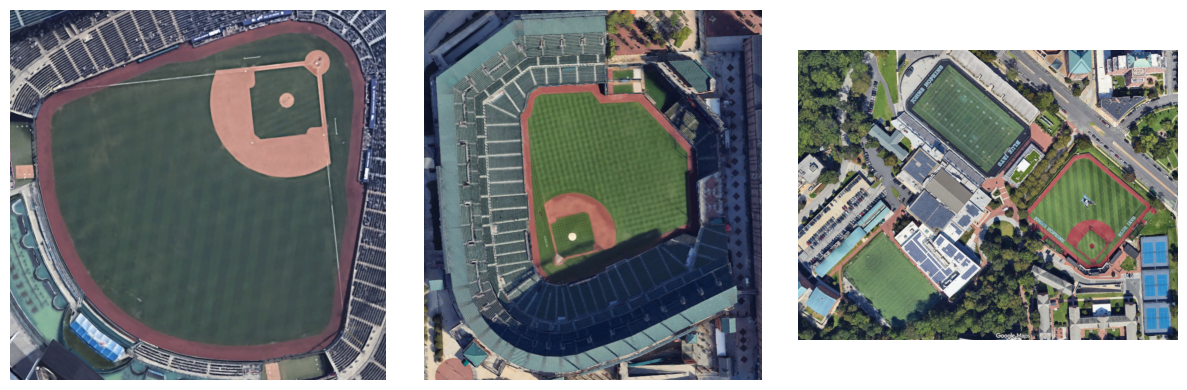

In [3]:
img1  = cv.cvtColor(cv.imread("kauffman.png"), cv.COLOR_BGR2HSV)
img2  = cv.cvtColor(cv.imread("camdenys.png"), cv.COLOR_BGR2HSV)
img3  = cv.cvtColor(cv.imread("combined.png"), cv.COLOR_BGR2HSV)
show(
    cv.cvtColor(img1, cv.COLOR_HSV2RGB),
    cv.cvtColor(img2, cv.COLOR_HSV2RGB),
    cv.cvtColor(img3, cv.COLOR_HSV2RGB)
)

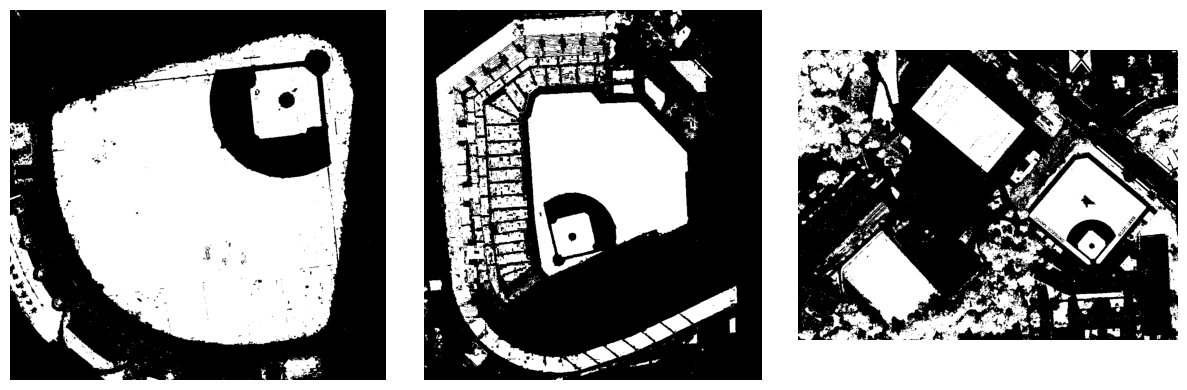

In [4]:
show(
    cv.inRange(img1, (30, 25, 50), (95, 200, 200)),
    cv.inRange(img2, (30, 25, 50), (95, 200, 200)),
    cv.inRange(img3, (30, 25, 50), (95, 200, 200))
)

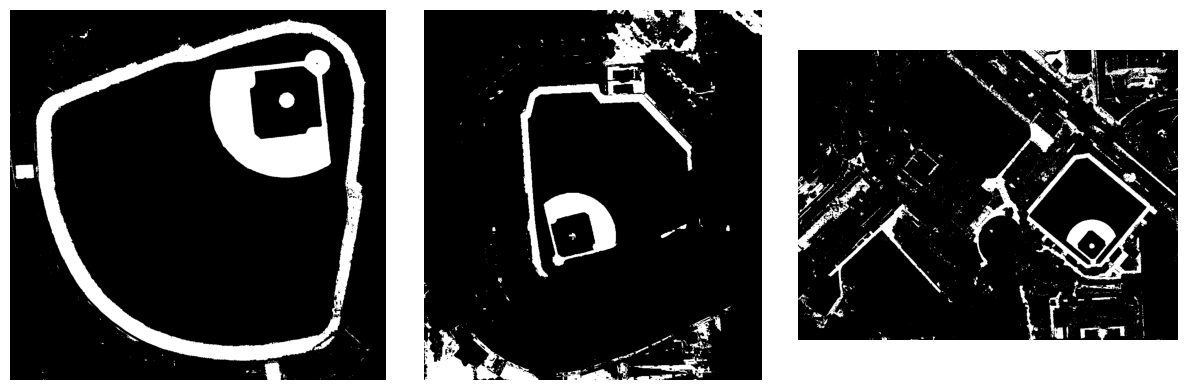

In [5]:
mask1 = cv.bitwise_or(
   cv.inRange(img1, (  0, 25, 50), ( 20, 255, 255)),
   cv.inRange(img1, (160, 25, 50), (179, 200, 200))
)
mask2 = cv.bitwise_or(
   cv.inRange(img2, (  0, 25, 50), ( 20, 255, 255)),
   cv.inRange(img2, (160, 25, 50), (179, 200, 200))
)
mask3 = cv.bitwise_or(
   cv.inRange(img3, (  0, 25, 50), ( 20, 255, 255)),
   cv.inRange(img3, (160, 25, 50), (179, 200, 200))
)
show(mask1, mask2, mask3)

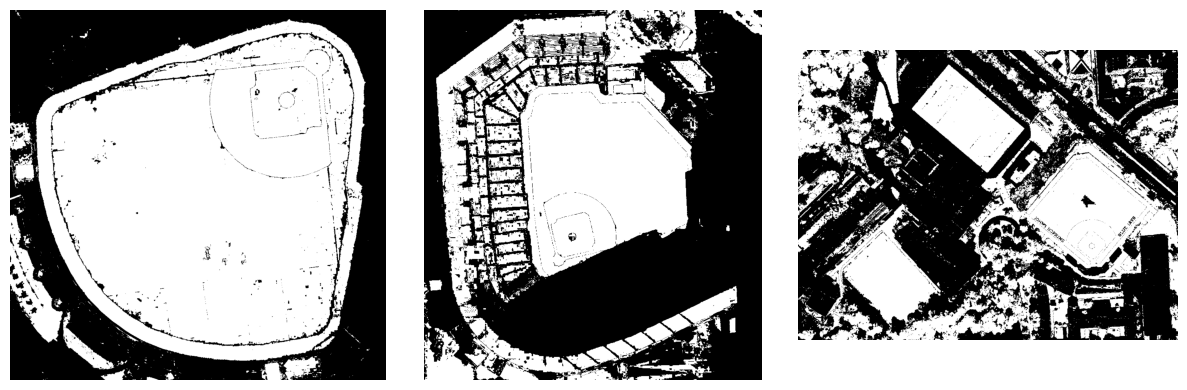

In [6]:
mask1a = cv.bitwise_or(mask1, cv.inRange(img1, (30, 25, 50), (95, 200, 200)))
mask2a = cv.bitwise_or(mask2, cv.inRange(img2, (30, 25, 50), (95, 200, 200)))
mask3a = cv.bitwise_or(mask3, cv.inRange(img3, (30, 25, 50), (95, 200, 200)))
show(mask1a, mask2a, mask3a)

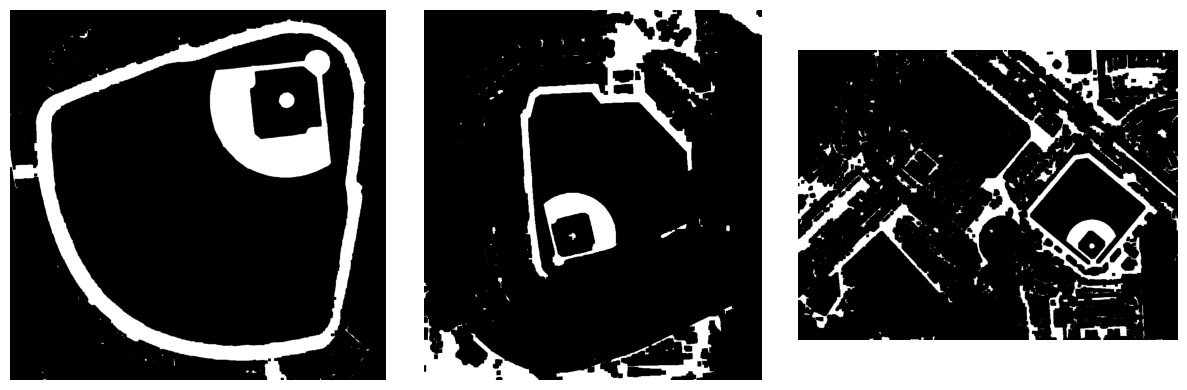

In [7]:
kernel = np.ones((9, 9), dtype=np.float64)
mask1b = cv.morphologyEx(mask1, cv.MORPH_CLOSE, kernel)
mask2b = cv.morphologyEx(mask2, cv.MORPH_CLOSE, kernel)
mask3b = cv.morphologyEx(mask3, cv.MORPH_CLOSE, kernel)
show(mask1b, mask2b, mask3b)

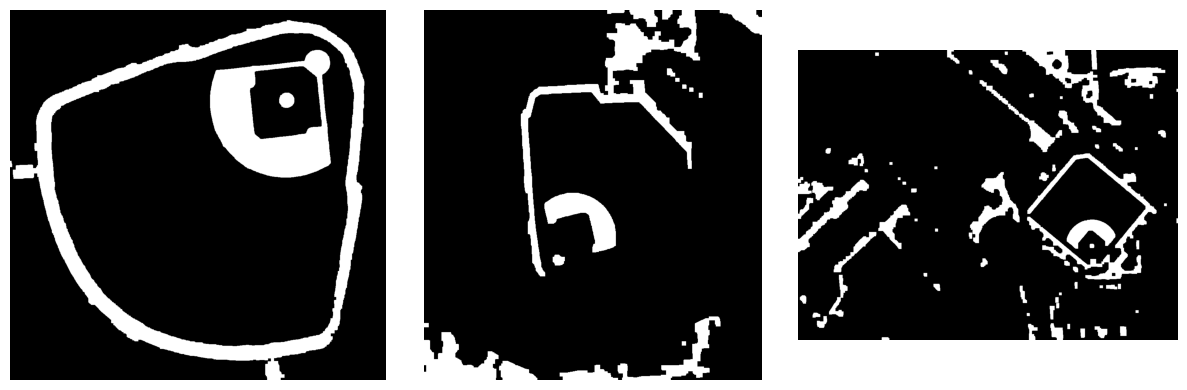

In [8]:
kernel = np.ones((9, 9), dtype=np.float64)
mask1c = cv.morphologyEx(mask1b, cv.MORPH_OPEN, kernel)
mask2c = cv.morphologyEx(mask2b, cv.MORPH_OPEN, kernel)
mask3c = cv.morphologyEx(mask3b, cv.MORPH_OPEN, kernel)
show(mask1c, mask2c, mask3c)

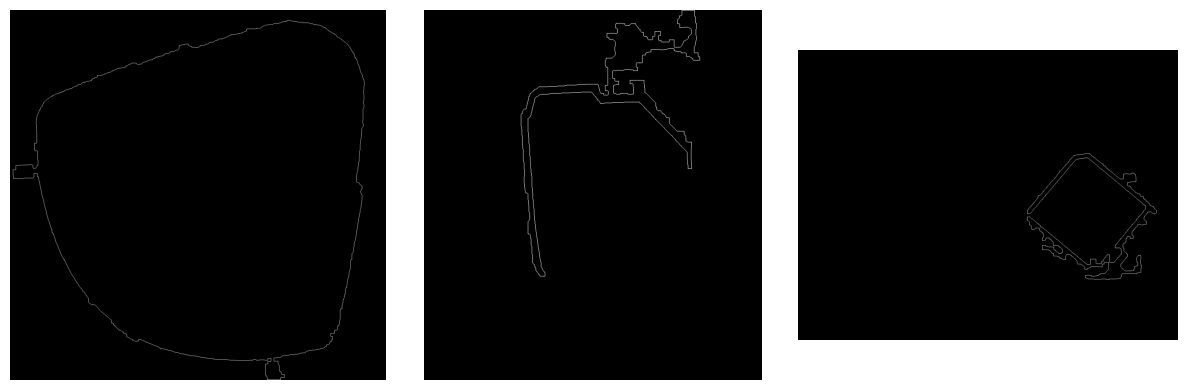

In [9]:
mask1d = np.zeros_like(mask1)
mask2d = np.zeros_like(mask2)
mask3d = np.zeros_like(mask3)
cont1, _ = cv.findContours(mask1c, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cont2, _ = cv.findContours(mask2c, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cont3, _ = cv.findContours(mask3c, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(mask1d, [max(cont1, key=cv.contourArea)], -1, 255, 1)
cv.drawContours(mask2d, [max(cont2, key=cv.contourArea)], -1, 255, 1)
cv.drawContours(mask3d, [max(cont3, key=cv.contourArea)], -1, 255, 1)
show(mask1d, mask2d, mask3d)

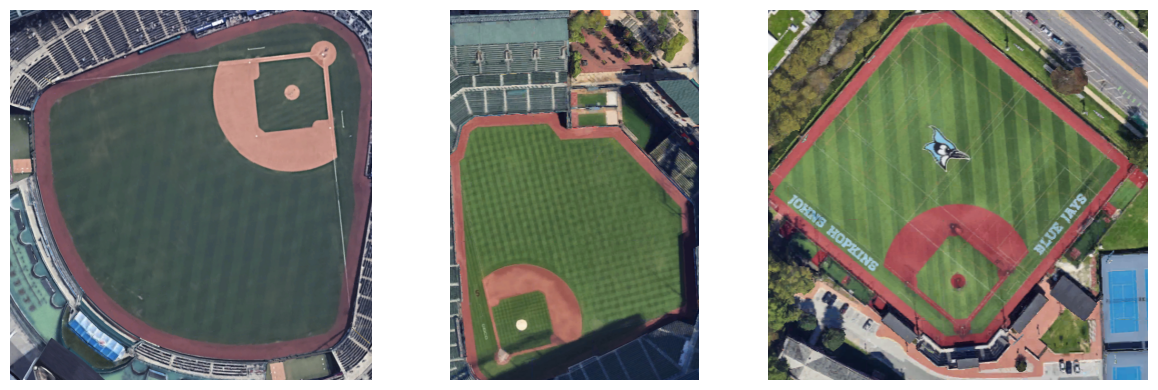

In [10]:
x1, y1, w1, h1 = cv.boundingRect(max(cont1, key=cv.contourArea))
x2, y2, w2, h2 = cv.boundingRect(max(cont2, key=cv.contourArea))
x3, y3, w3, h3 = cv.boundingRect(max(cont3, key=cv.contourArea))
img1a = img1[y1:y1+h1, x1:x1+w1]
img2a = img2[y2:y2+h2, x2:x2+w2]
img3a = img3[y3:y3+h3, x3:x3+w3]
show(
    cv.cvtColor(img1a, cv.COLOR_HSV2RGB),
    cv.cvtColor(img2a, cv.COLOR_HSV2RGB),
    cv.cvtColor(img3a, cv.COLOR_HSV2RGB)
)